In [427]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [428]:
import matplotlib.patches as patches

In [429]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[plt.get_cmap('Dark2')(a) for a in np.arange(0.,0.9,0.12)][::-1]) 

In [464]:
ds=1
lx=20000
ly=5000
Nx=int(lx/ds)
Ny=int(ly/ds)

In [488]:
rho=pd.read_csv('f_m.dat', sep=' ', names=np.arange(Ny), index_col=False, dtype=np.float64)

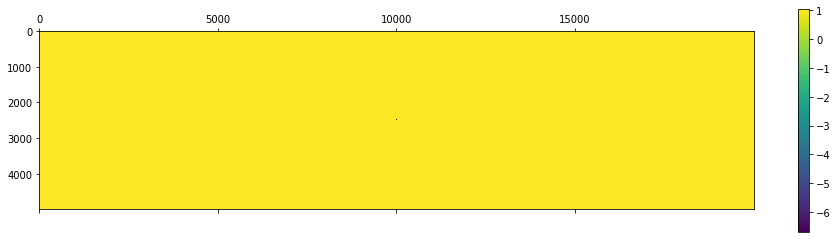

In [493]:
t=1
plt.matshow(rho.values[t*Nx:(t+1)*Nx,:].T)
plt.colorbar()

In [322]:
rho

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,...,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117
1,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,...,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117
2,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,...,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117
3,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,...,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117
4,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,...,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117,1.837117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,...,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660
9994,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,...,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660
9995,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,...,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660
9996,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,...,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660,1.060660


No handles with labels found to put in legend.


Text(0.5, 1.0, '$m(x, y=250)$')

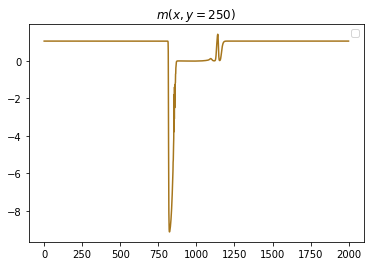

In [460]:
for t in np.arange(5, 100,10):
    m=rho.values[t*Nx:(t+1)*Nx,:].T
    plt.plot(m[int(Ny/2),:])#, label=r'$t=%d$'%(1*t))
plt.legend()
# plt.xlim(400,600)
# plt.ylim(-10,4)
plt.title(r'$m(x, y=%d)$'%int(Ny/2))

Text(0.5, 1.0, '$m(x, y=125)$')

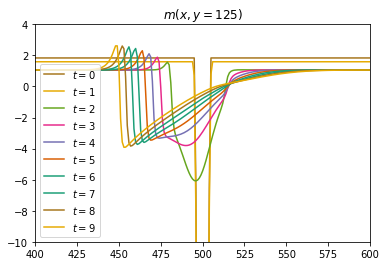

In [365]:
for t in np.arange(0, 10):
    m=rho.values[t*Nx:(t+1)*Nx,:].T
    plt.plot(m[int(Ny/2),:], label=r'$t=%d$'%(1*t))
plt.legend()
plt.xlim(400,600)
plt.ylim(-10,4)
plt.title(r'$m(x, y=%d)$'%int(Ny/2))

[ 0.         -0.57649233 -1.15298467 -1.729477   -2.30596933]
496 504 121 129


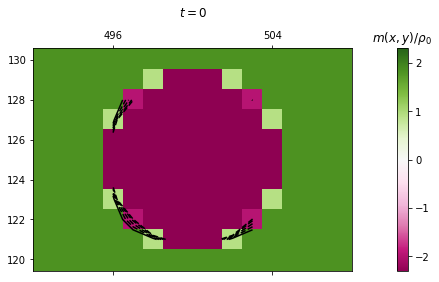

471 514 105 145


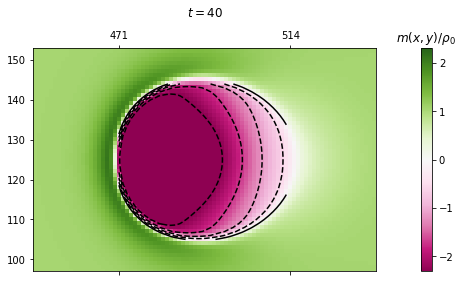

455 508 105 145


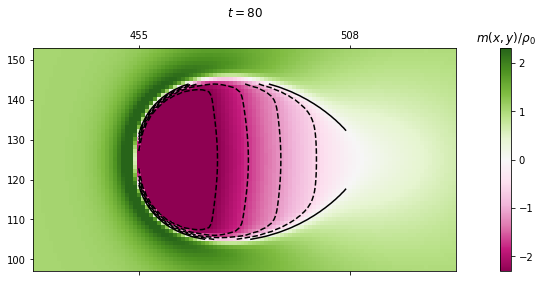

440 494 106 144


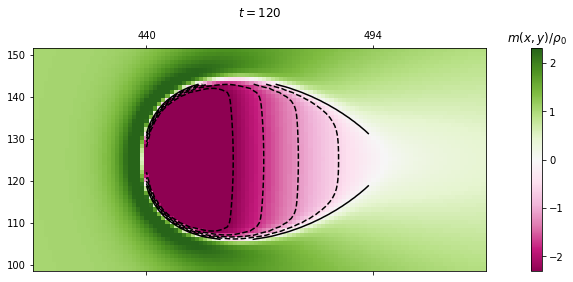

424 478 107 143


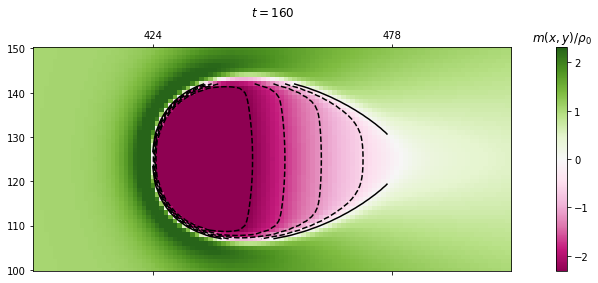

409 463 107 143


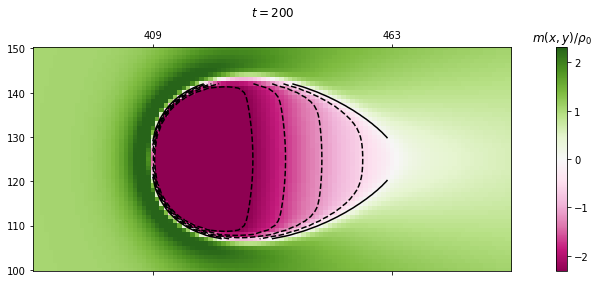

394 447 107 143


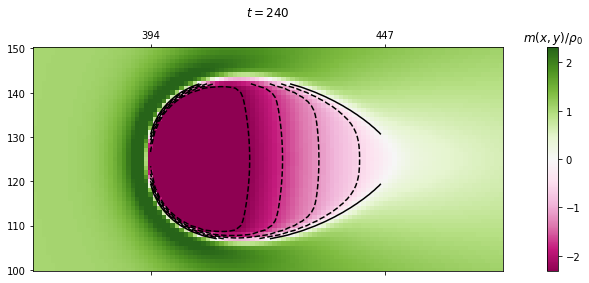

378 432 107 143


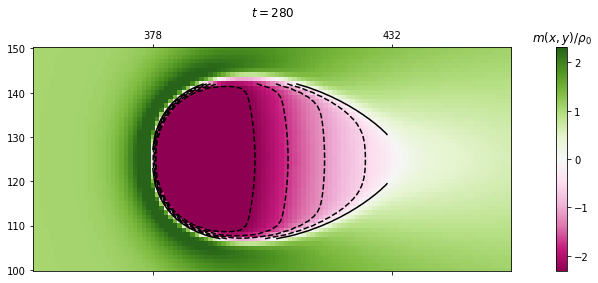

In [361]:
rho0=1.5
t=5
V=np.max(np.max(np.abs(rho.values[t*Nx:(t+1)*Nx,:])))/rho0
print(np.linspace(0, -V, 5))
for t in np.arange(0, 30,4):
    m=rho.values[t*Nx:(t+1)*Nx,:].T
    xmin=np.where((np.roll(m[np.int64(Ny/2),:],1)>0)&(m[np.int64(Ny/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(Ny/2),xmin+1:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(Ny/2)#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)

    print(xmin, xmax, ymin, ymax)
    l=plt.matshow(m, cmap='PiYG', vmin=-V, vmax=V)
    cbar=plt.colorbar(l)
    cbar.ax.set_title(r'$m(x,y)/\rho_0$', rotation=0)

    offsetx=0.5*(xmax-xmin)
    offsety=0.2*(ymax-ymin)
    plt.xlim(xmin-offsetx, xmax+offsetx)
    plt.ylim(ymin-offsety, ymax+offsety)

    
    xlist = np.arange(xmin, xmax)
    ylist = np.arange(ymin, ymax)
    X, Y = np.meshgrid(xlist, ylist)
    Z = m[ymin:ymax,xmin:xmax]
    cp = plt.contour(X, Y, Z, levels=np.linspace(0, -V, 5)[::-1], colors=['k'])
    
    plt.xticks([xmin, xmax])
    plt.title(r'$t=%d$'%(10*t), pad=20)
    plt.show()
    

